In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def separate_data_points(file_location):
    dataframe = pd.read_csv(file_location, skiprows=[0], header=None)
    print(dataframe)
    return dataframe.iloc[:,9:]
# currently taking a single file
data_points = separate_data_points('../data/1.csv')

     0         1     2     3     4         5     6          7     8     \
0    1171  15:59:04     0  1170     0  0.003003     1  1142900.0  5714   
1    1172  15:59:04     0  1171     0  0.003003     1  1142900.0  5714   
2    1173  15:59:04     0  1172     0  0.003003     1  1142900.0  5714   
3    1174  15:59:05     0  1173     0  0.003003     1  1142900.0  5714   
4    1175  15:59:05     0  1174     0  0.003003     1  1142900.0  5714   
5    1176  15:59:05     0  1175     0  0.003003     1  1142900.0  5714   
6    1177  15:59:06     0  1176     0  0.003003     1  1142900.0  5714   
7    1178  15:59:06     0  1177     0  0.003003     1  1142900.0  5714   
8    1179  15:59:06     0  1178     0  0.003003     1  1142900.0  5714   
9    1180  15:59:07     0  1179     0  0.003003     1  1142900.0  5714   
10   1181  15:59:07     0  1180     0  0.003003     1  1142900.0  5714   
11   1182  15:59:07     0  1181     0  0.003003     1  1142900.0  5714   
12   1183  15:59:07     0  1182     0 

In [70]:
required_data = data_points.iloc[0,:].to_numpy()
mean = np.mean(required_data)
required_data_without_offset = required_data - mean

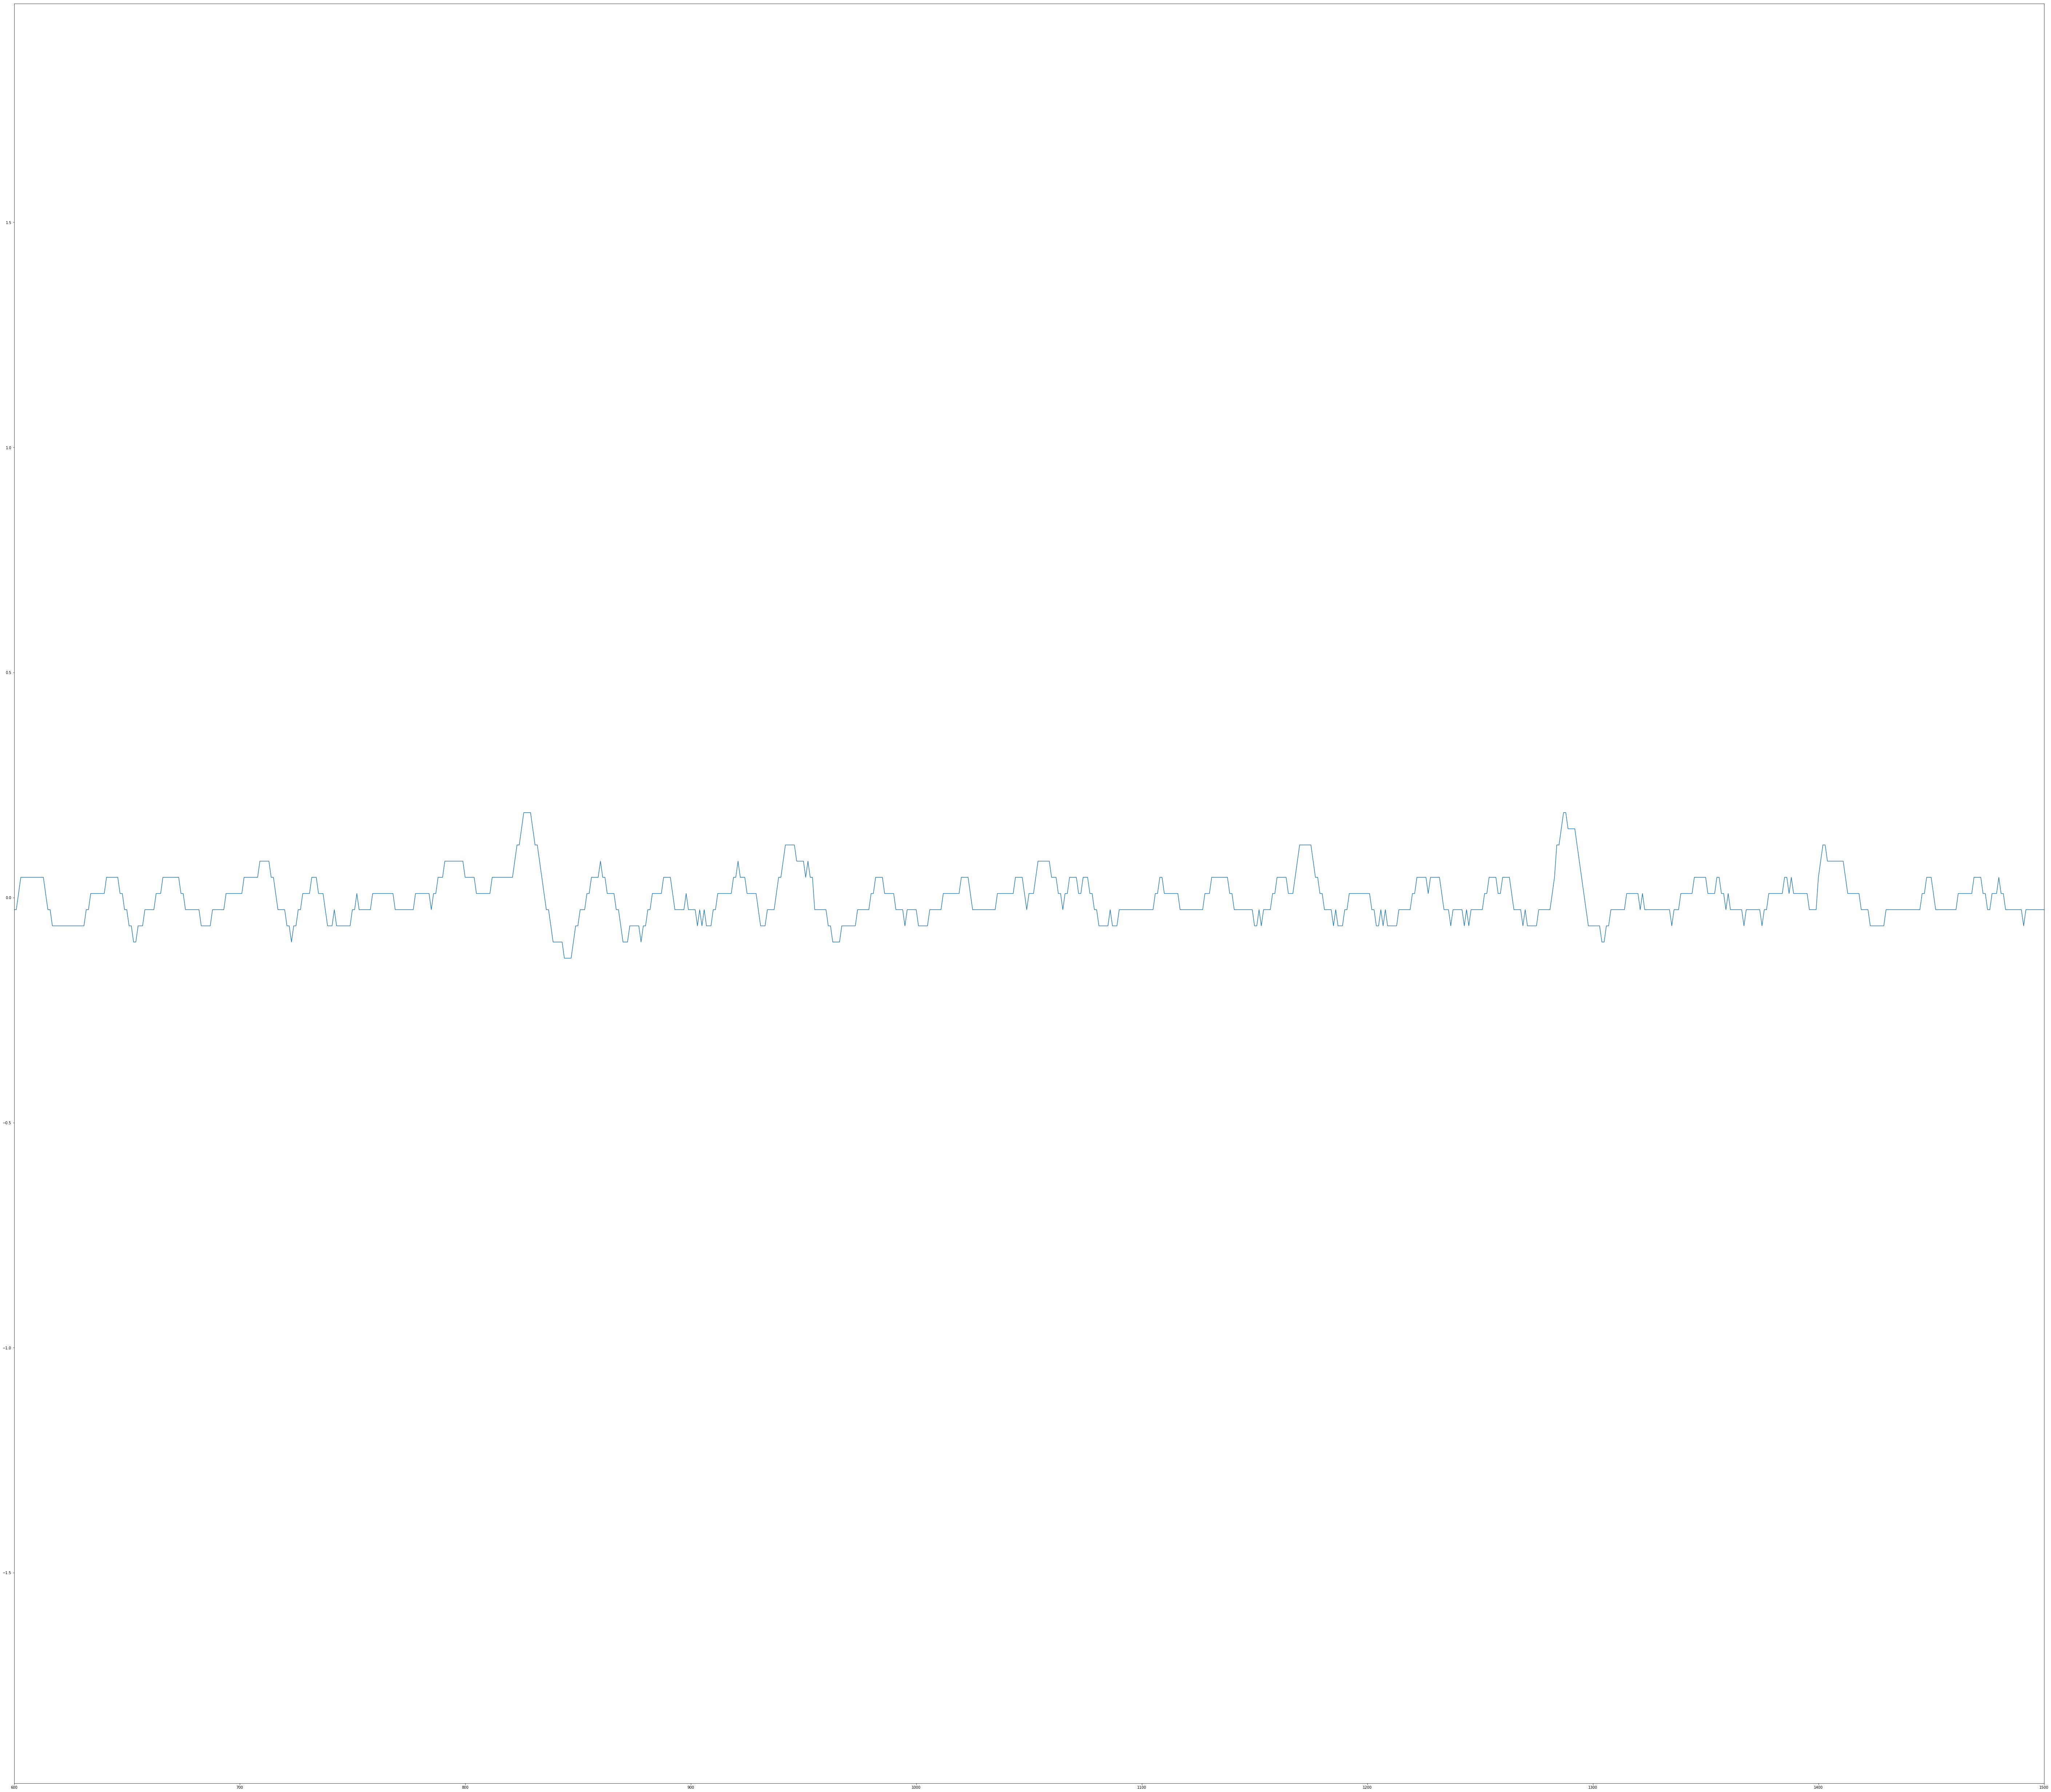

In [115]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100, 90))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([600,1500])
ax.plot(required_data_without_offset)

In [72]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs = 1.14 * 1000000 #1.14MHZ
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set


In [106]:
ff_list = fft_from_data_frame(data_points.iloc[:,10:])
ff_data = pd.DataFrame(ff_list)

In [110]:
len(ff_list[0])

100

In [88]:
fft_data_set = pd.DataFrame()
fft_data_set = fft_data_set.append(
                        ff_data, ignore_index=True)

In [89]:
fft_data_set = fft_data_set.append(
                        ff_data, ignore_index=True)

In [90]:
fft_data_set

,distance,type,model,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,distance,type,model,0.001376,0.001620,0.001285,0.001234,0.000982,0.000896,0.000674,...,0.000221,0.000202,0.000312,0.000422,0.001074,0.000300,0.000870,0.005477,0.002059,0.000484
1,distance,type,model,0.001603,0.002008,0.001319,0.001359,0.001602,0.000999,0.000814,...,0.000790,0.001053,0.000933,0.000115,0.000296,0.000449,0.002221,0.005721,0.000818,0.000712
2,distance,type,model,0.002025,0.001992,0.000342,0.000765,0.001121,0.000683,0.003121,...,0.000184,0.000257,0.000459,0.001017,0.001171,0.001000,0.002022,0.006414,0.000965,0.000842
3,distance,type,model,0.001021,0.001709,0.001359,0.001071,0.000402,0.001618,0.001808,...,0.001269,0.000069,0.001017,0.000869,0.000577,0.001239,0.000866,0.005965,0.000924,0.001294
4,distance,type,model,0.001036,0.000876,0.001679,0.000460,0.000994,0.000549,0.001609,...,0.000419,0.000603,0.000408,0.000782,0.000651,0.000106,0.000904,0.006538,0.001379,0.000075
5,distance,type,model,0.001148,0.001273,0.001290,0.001070,0.000839,0.001226,0.000797,...,0.000554,0.000325,0.000098,0.000256,0.000825,0.001083,0.001061,0.007343,0.001093,0.000671
6,distance,type,model,0.001618,0.001468,0.000852,0.001786,0.000285,0.001471,0.000585,...,0.000282,0.000212,0.000894,0.000669,0.000674,0.000567,0.001931,0.006447,0.000722,0.001472
7,distance,type,model,0.001701,0.001068,0.001211,0.002037,0.001163,0.001141,0.001288,...,0.000385,0.001232,0.000301,0.000183,0.000449,0.000531,0.001114,0.007110,0.001007,0.000975
8,distance,type,model,0.001224,0.000735,0.000622,0.001159,0.001477,0.000887,0.000283,...,0.001135,0.000258,0.001162,0.000912,0.000322,0.001446,0.001155,0.004713,0.000342,0.000231
9,distance,type,model,0.002436,0.000953,0.002250,0.000285,0.001234,0.001697,0.002681,...,0.000206,0.000433,0.000218,0.000699,0.000757,0.000598,0.001724,0.005951,0.000837,0.001442


In [39]:
df = pd.read_excel(open('./oma_data.xlsx','rb'), sheetname='bbg_data')

In [63]:
df["issue_dt"] = pd.to_datetime(df["issue_dt"])

str(df.values[0][2].date()) == '2006-09-22'

True

In [67]:

a = [[12,123,33],[1,2,3,4]]
df = pd.DataFrame(a)

In [111]:
a = {'hel':1}

In [113]:
if a:
    print('s')

s
